In [7]:
import numpy as np
import matplotlib.pyplot as plt

####Training a deep neural network by minimizing a loss function using gradient descent.

In [8]:
class SimpleNetwork:
    def __init__(self):
        self.W1 = np.random.randn(2, 2) * 0.5  # Input to hidden weights
        self.b1 = np.zeros((1, 2))             # Hidden layer bias
        self.W2 = np.random.randn(2, 1) * 0.5  # Hidden to output weights
        self.b2 = np.zeros((1, 1))             # Output layer bias

        print(f"Network initialized with random weights:")
        print(f"W1 (input->hidden): \n{self.W1}")
        print(f"W2 (hidden->output): \n{self.W2}")

# Create our simple network
net = SimpleNetwork()

def simple_forward_pass(X, W1, b1, W2, b2):
    # Step 1: Input to Hidden layer
    hidden_input = np.dot(X, W1) + b1          # Linear combination
    hidden_output = 1 / (1 + np.exp(-hidden_input))  # Sigmoid activation

    # Step 2: Hidden to Output layer
    final_input = np.dot(hidden_output, W2) + b2      # Linear combination
    final_output = final_input                        # No activation (regression)

    return final_output, hidden_output

# Test the forward pass
test_input = np.array([[1, 2]])  # One sample: [feature1=1, feature2=2]
prediction, hidden = simple_forward_pass(test_input, net.W1, net.b1, net.W2, net.b2)
print(f"\nExample forward pass:")
print(f"Input: {test_input}")
print(f"Hidden layer output: {hidden}")
print(f"Final prediction: {prediction}")

def calculate_loss(true_value, predicted_value):
    loss = (true_value - predicted_value) ** 2
    return loss

# Example of loss calculation
true_answer = 5
our_prediction = 3
error = calculate_loss(true_answer, our_prediction)
print(f"\nLoss calculation example:")
print(f"True answer: {true_answer}")
print(f"Our prediction: {our_prediction}")
print(f"Loss (error): {error}")
print(f"Goal: Make this loss as small as possible!")

Network initialized with random weights:
W1 (input->hidden): 
[[ 0.83002985  0.92634734]
 [-0.5921958   0.65951273]]
W2 (hidden->output): 
[[ 0.37953324]
 [-0.45147305]]

Example forward pass:
Input: [[1 2]]
Hidden layer output: [[0.41232511 0.90425065]]
Final prediction: [[-0.25175371]]

Loss calculation example:
True answer: 5
Our prediction: 3
Loss (error): 4
Goal: Make this loss as small as possible!


#### Backpropagation and gradient is calculated



In [9]:
def simple_backpropagation(X, y_true, W1, b1, W2, b2):
    print("BACKPROPAGATION STEPS:")

    print("Step 1: Forward pass to get predictions")
    hidden_input = np.dot(X, W1) + b1
    hidden_output = 1 / (1 + np.exp(-hidden_input))  # Sigmoid
    final_input = np.dot(hidden_output, W2) + b2
    y_pred = final_input

    print(f"  Prediction: {y_pred.flatten()}")
    print(f"  True value: {y_true.flatten()}")

    # STEP 2: Calculate the error
    loss = np.mean((y_true - y_pred) ** 2)
    print(f"  Loss: {loss}")

    print("Step 2: Calculate gradients (working backwards)")

    dLoss_dPred = -2 * (y_true - y_pred)  # Derivative of MSE
    print(f"  dLoss/dPrediction: {dLoss_dPred.flatten()}")

    dLoss_dW2 = np.dot(hidden_output.T, dLoss_dPred)
    dLoss_db2 = np.sum(dLoss_dPred, axis=0, keepdims=True)

    print(f"  dLoss/dW2: {dLoss_dW2.flatten()}")
    print(f"  dLoss/db2: {dLoss_db2.flatten()}")

    dLoss_dHidden = np.dot(dLoss_dPred, W2.T)  # Error flowing back

    # Apply derivative of sigmoid activation
    sigmoid_derivative = hidden_output * (1 - hidden_output)
    dLoss_dHiddenInput = dLoss_dHidden * sigmoid_derivative

    dLoss_dW1 = np.dot(X.T, dLoss_dHiddenInput)
    dLoss_db1 = np.sum(dLoss_dHiddenInput, axis=0, keepdims=True)

    print(f"  dLoss/dW1: {dLoss_dW1.flatten()}")
    print(f"  dLoss/db1: {dLoss_db1.flatten()}")

    # Return all gradients
    gradients = {
        'dW1': dLoss_dW1, 'db1': dLoss_db1,
        'dW2': dLoss_dW2, 'db2': dLoss_db2
    }

    return loss, gradients

# Test backpropagation
X_sample = np.array([[1, 2]])
y_sample = np.array([[5]])
loss, grads = simple_backpropagation(X_sample, y_sample, net.W1, net.b1, net.W2, net.b2)

for name, grad in grads.items():
    magnitude = np.sqrt(np.sum(grad**2))
    print(f"  {name}: {magnitude:.4f}")

def update_weights(W1, b1, W2, b2, gradients, learning_rate=0.1):
    """
    New weight = Old weight - learning_rate * gradient
    """
    print(f"\nUPDATING WEIGHTS (learning rate = {learning_rate}):")

    # Update each weight
    W1_new = W1 - learning_rate * gradients['dW1']
    b1_new = b1 - learning_rate * gradients['db1']
    W2_new = W2 - learning_rate * gradients['dW2']
    b2_new = b2 - learning_rate * gradients['db2']

    print("Weight changes:")
    print(f"  W1 change: {np.max(np.abs(learning_rate * gradients['dW1'])):.4f}")
    print(f"  W2 change: {np.max(np.abs(learning_rate * gradients['dW2'])):.4f}")

    return W1_new, b1_new, W2_new, b2_new

# Update the weights
net.W1, net.b1, net.W2, net.b2 = update_weights(net.W1, net.b1, net.W2, net.b2, grads)

BACKPROPAGATION STEPS:
Step 1: Forward pass to get predictions
  Prediction: [-0.25175371]
  True value: [5]
  Loss: 27.58091706884838
Step 2: Calculate gradients (working backwards)
  dLoss/dPrediction: [-10.50350743]
  dLoss/dW2: [-4.33085987 -9.49780346]
  dLoss/db2: [-10.50350743]
  dLoss/dW1: [-0.96596432  0.41057342 -1.93192864  0.82114683]
  dLoss/db1: [-0.96596432  0.41057342]

Gradient magnitudes (how much each weight should change):
  dW1: 2.3470
  db1: 1.0496
  dW2: 10.4386
  db2: 10.5035

UPDATING WEIGHTS (learning rate = 0.1):
Weight changes:
  W1 change: 0.1932
  W2 change: 0.9498


#### Vanishing and exploding gradient

In [10]:
def demonstrate_gradient_problems():
    print("DEMONSTRATING GRADIENT PROBLEMS:")

    # Create a deeper network to amplify the problem
    def deep_network_gradients(depth, activation_type):
        # Simulate gradients flowing through many layers
        gradient = 1.0  # Start with gradient of 1
        gradients_at_each_layer = [gradient]

        for layer in range(depth):
            if activation_type == 'vanishing':
                # Simulate sigmoid-like behavior (gradients get smaller)
                gradient = gradient * 0.25  # Each layer reduces gradient
            elif activation_type == 'exploding':
                # Simulate poorly initialized weights (gradients get larger)
                gradient = gradient * 2.5   # Each layer increases gradient

            gradients_at_each_layer.append(gradient)

        return gradients_at_each_layer

    # Demonstrate vanishing gradients
    layers = 10
    vanishing_grads = deep_network_gradients(layers, 'vanishing')
    exploding_grads = deep_network_gradients(layers, 'exploding')

    print(f"\nVanishing gradients through {layers} layers:")
    for i, grad in enumerate(vanishing_grads):
        print(f"  Layer {i}: gradient = {grad:.8f}")

    print(f"\nExploding gradients through {layers} layers:")
    for i, grad in enumerate(exploding_grads[:6]):  # Show first 6 to avoid huge numbers
        print(f"  Layer {i}: gradient = {grad:.2f}")

    # Check for problems
    final_vanishing = vanishing_grads[-1]
    final_exploding = exploding_grads[5]  # Don't let it get too big

    if final_vanishing < 1e-6:
        print(f"\n⚠️  VANISHING GRADIENT PROBLEM: Final gradient = {final_vanishing:.2e}")
        print("   Early layers will barely learn!")

    if final_exploding > 1000:
        print(f"\n⚠️  EXPLODING GRADIENT PROBLEM: Gradient = {final_exploding:.2f}")
        print("   Training will become unstable!")

demonstrate_gradient_problems()

DEMONSTRATING GRADIENT PROBLEMS:

Vanishing gradients through 10 layers:
  Layer 0: gradient = 1.00000000
  Layer 1: gradient = 0.25000000
  Layer 2: gradient = 0.06250000
  Layer 3: gradient = 0.01562500
  Layer 4: gradient = 0.00390625
  Layer 5: gradient = 0.00097656
  Layer 6: gradient = 0.00024414
  Layer 7: gradient = 0.00006104
  Layer 8: gradient = 0.00001526
  Layer 9: gradient = 0.00000381
  Layer 10: gradient = 0.00000095

Exploding gradients through 10 layers:
  Layer 0: gradient = 1.00
  Layer 1: gradient = 2.50
  Layer 2: gradient = 6.25
  Layer 3: gradient = 15.62
  Layer 4: gradient = 39.06
  Layer 5: gradient = 97.66

⚠️  VANISHING GRADIENT PROBLEM: Final gradient = 9.54e-07
   Early layers will barely learn!


#### Activation function influence gradient issues

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish(x):
    return x * sigmoid(x)

# Derivatives (for gradient calculation)
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh_derivative(x):
    return 1 - tanh(x)**2

def relu_derivative(x):
    return (x > 0).astype(float)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def elu_derivative(x, alpha=1.0):
    return np.where(x > 0, 1, alpha * np.exp(x))

def swish_derivative(x):
    s = sigmoid(x)
    return s + x * s * (1 - s)

def test_activation_gradients():
    """
    Test how different activation functions behave with gradients
    """
    print("TESTING ACTIVATION FUNCTIONS:")

    # Test with different input values
    test_inputs = np.array([-5, -2, -0.5, 0, 0.5, 2, 5])

    activations = {
        'Sigmoid': (sigmoid, sigmoid_derivative),
        'Tanh': (tanh, tanh_derivative),
        'ReLU': (relu, relu_derivative),
        'Leaky ReLU': (leaky_relu, leaky_relu_derivative),
        'ELU': (elu, elu_derivative),
        'Swish': (swish, swish_derivative)
    }

    print(f"\nInput values: {test_inputs}")
    print("-" * 60)

    for name, (func, deriv_func) in activations.items():
        outputs = func(test_inputs)
        derivatives = deriv_func(test_inputs)

        print(f"{name}:")
        print(f"  Outputs:     {outputs}")
        print(f"  Derivatives: {derivatives}")

        # Check for gradient issues
        min_derivative = np.min(np.abs(derivatives[derivatives != 0]))
        max_derivative = np.max(np.abs(derivatives))

        if min_derivative < 0.01:
            print(f"  ⚠️  Small derivatives detected (min: {min_derivative:.4f})")
        elif max_derivative > 10:
            print(f"  ⚠️  Large derivatives detected (max: {max_derivative:.4f}) ")
        else:
            print(f"  ✅ Derivatives look good (range: {min_derivative:.4f} to {max_derivative:.4f})")
        print()

test_activation_gradients()

TESTING ACTIVATION FUNCTIONS:

Input values: [-5.  -2.  -0.5  0.   0.5  2.   5. ]
------------------------------------------------------------
Sigmoid:
  Outputs:     [0.00669285 0.11920292 0.37754067 0.5        0.62245933 0.88079708
 0.99330715]
  Derivatives: [0.00664806 0.10499359 0.23500371 0.25       0.23500371 0.10499359
 0.00664806]
  ⚠️  Small derivatives detected (min: 0.0066) - may cause vanishing gradients

Tanh:
  Outputs:     [-0.9999092  -0.96402758 -0.46211716  0.          0.46211716  0.96402758
  0.9999092 ]
  Derivatives: [1.81583231e-04 7.06508249e-02 7.86447733e-01 1.00000000e+00
 7.86447733e-01 7.06508249e-02 1.81583231e-04]
  ⚠️  Small derivatives detected (min: 0.0002) - may cause vanishing gradients

ReLU:
  Outputs:     [0.  0.  0.  0.  0.5 2.  5. ]
  Derivatives: [0. 0. 0. 0. 1. 1. 1.]
  ✅ Derivatives look good (range: 1.0000 to 1.0000)

Leaky ReLU:
  Outputs:     [-0.05  -0.02  -0.005  0.     0.5    2.     5.   ]
  Derivatives: [0.01 0.01 0.01 0.01 1.   1.   1

In [12]:
def simple_training_comparison():
    """
    Train simple networks with different activation functions
    """
    print("TRAINING COMPARISON WITH DIFFERENT ACTIVATIONS:")
    print("-" * 50)

    # Simple training data
    np.random.seed(42)
    X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
    y = np.array([[5], [8], [11], [14]])  # y = 3*x1 + 2*x2 - 1

    activations_to_test = ['sigmoid', 'relu']
    results = {}

    for activation_name in activations_to_test:
        print(f"\nTraining with {activation_name.upper()}:")

        # Initialize simple network
        W1 = np.random.randn(2, 3) * 0.5
        b1 = np.zeros((1, 3))
        W2 = np.random.randn(3, 1) * 0.5
        b2 = np.zeros((1, 1))

        losses = []
        gradient_norms = []

        # Train for a few epochs
        for epoch in range(50):
            # Forward pass
            if activation_name == 'sigmoid':
                hidden = sigmoid(np.dot(X, W1) + b1)
            else:  # relu
                hidden = relu(np.dot(X, W1) + b1)

            prediction = np.dot(hidden, W2) + b2
            loss = np.mean((y - prediction) ** 2)
            losses.append(loss)

            # Simple gradient calculation (simplified)
            dL_dpred = -2 * (y - prediction) / len(y)
            dL_dW2 = np.dot(hidden.T, dL_dpred)

            # Calculate gradient norm
            grad_norm = np.sqrt(np.sum(dL_dW2**2))
            gradient_norms.append(grad_norm)

            # Simple update
            W2 -= 0.01 * dL_dW2

            if epoch % 10 == 0:
                print(f"  Epoch {epoch}: Loss = {loss:.4f}, Gradient norm = {grad_norm:.4f}")

        results[activation_name] = {
            'final_loss': losses[-1],
            'final_gradient': gradient_norms[-1]
        }

    print(f"\nFINAL RESULTS:")
    for activation, result in results.items():
        print(f"{activation.upper()}:")
        print(f"  Final loss: {result['final_loss']:.4f}")
        print(f"  Final gradient norm: {result['final_gradient']:.4f}")

simple_training_comparison()

TRAINING COMPARISON WITH DIFFERENT ACTIVATIONS:
--------------------------------------------------

Training with SIGMOID:
  Epoch 0: Loss = 87.9107, Gradient norm = 20.8889
  Epoch 10: Loss = 53.9979, Gradient norm = 15.8050
  Epoch 20: Loss = 34.5819, Gradient norm = 11.9598
  Epoch 30: Loss = 23.4627, Gradient norm = 9.0517
  Epoch 40: Loss = 17.0918, Gradient norm = 6.8530

Training with RELU:
  Epoch 0: Loss = 108.3229, Gradient norm = 24.6635
  Epoch 10: Loss = 61.3016, Gradient norm = 18.5433
  Epoch 20: Loss = 34.7214, Gradient norm = 13.9418
  Epoch 30: Loss = 19.6960, Gradient norm = 10.4822
  Epoch 40: Loss = 11.2025, Gradient norm = 7.8811

FINAL RESULTS:
SIGMOID:
  Final loss: 13.7194
  Final gradient norm: 5.3373
RELU:
  Final loss: 6.7677
  Final gradient norm: 6.0968




VISUALIZATION: ACTIVATION FUNCTIONS AND DERIVATIVES


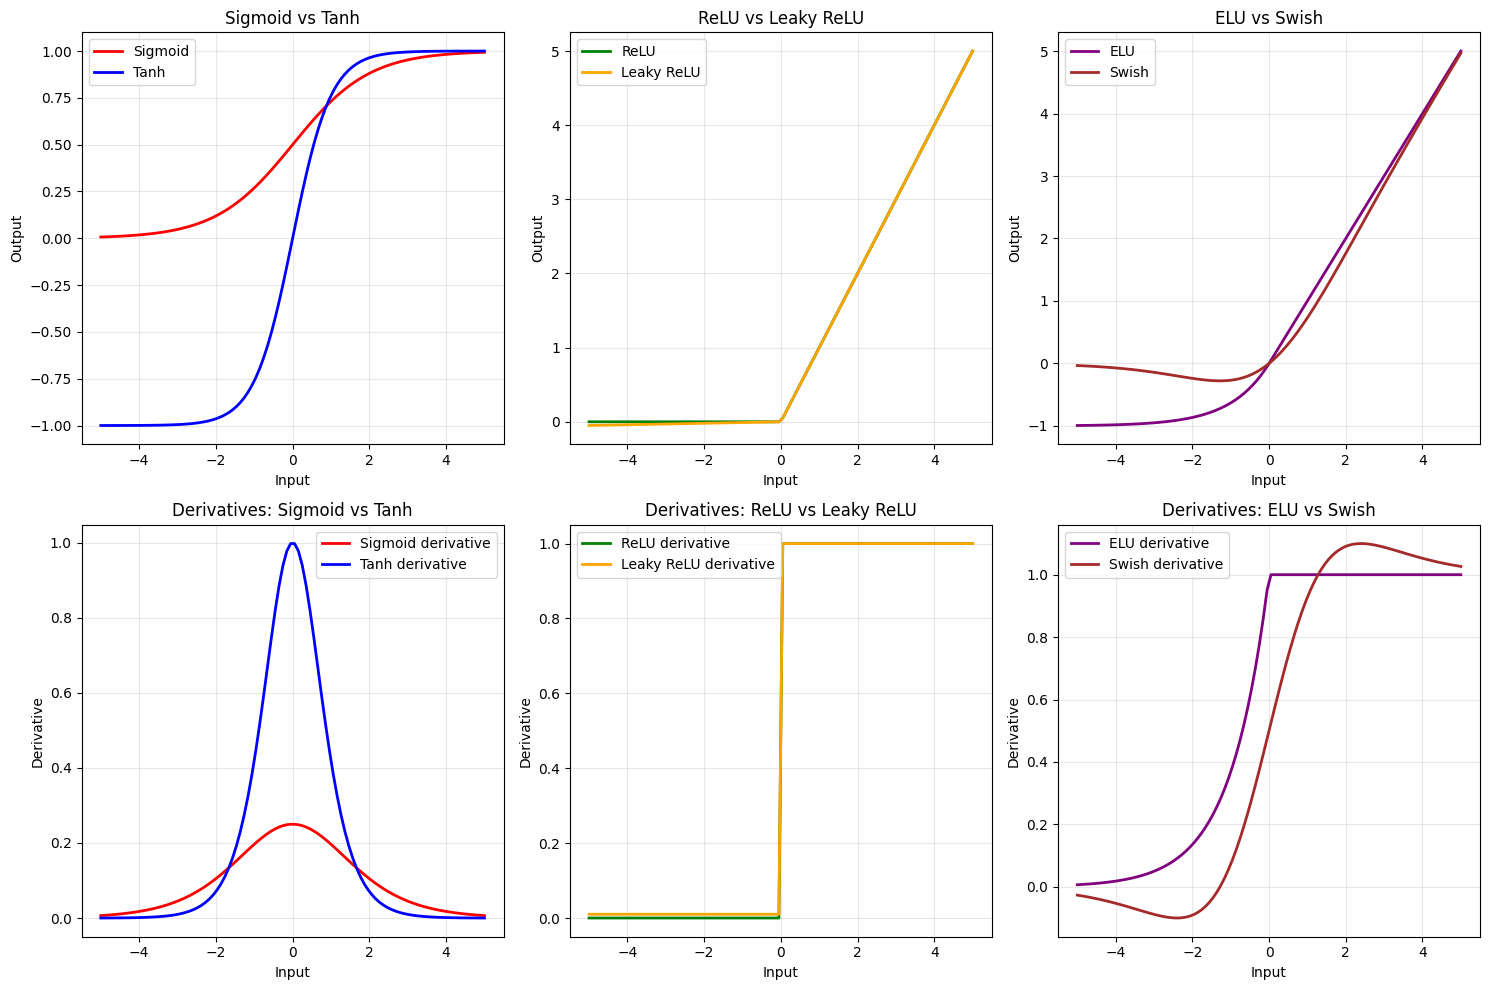

In [13]:
print("\n\nVISUALIZATION: ACTIVATION FUNCTIONS AND DERIVATIVES")
print("="*60)

# Create plots to visualize activation functions
x = np.linspace(-5, 5, 100)

plt.figure(figsize=(15, 10))

# Plot activation functions
plt.subplot(2, 3, 1)
plt.plot(x, sigmoid(x), label='Sigmoid', color='red', linewidth=2)
plt.plot(x, tanh(x), label='Tanh', color='blue', linewidth=2)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Sigmoid vs Tanh')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 2)
plt.plot(x, relu(x), label='ReLU', color='green', linewidth=2)
plt.plot(x, leaky_relu(x), label='Leaky ReLU', color='orange', linewidth=2)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('ReLU vs Leaky ReLU')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 3)
plt.plot(x, elu(x), label='ELU', color='purple', linewidth=2)
plt.plot(x, swish(x), label='Swish', color='brown', linewidth=2)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('ELU vs Swish')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot derivatives
plt.subplot(2, 3, 4)
plt.plot(x, sigmoid_derivative(x), label='Sigmoid derivative', color='red', linewidth=2)
plt.plot(x, tanh_derivative(x), label='Tanh derivative', color='blue', linewidth=2)
plt.xlabel('Input')
plt.ylabel('Derivative')
plt.title('Derivatives: Sigmoid vs Tanh')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 5)
plt.plot(x, relu_derivative(x), label='ReLU derivative', color='green', linewidth=2)
plt.plot(x, leaky_relu_derivative(x), label='Leaky ReLU derivative', color='orange', linewidth=2)
plt.xlabel('Input')
plt.ylabel('Derivative')
plt.title('Derivatives: ReLU vs Leaky ReLU')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 6)
plt.plot(x, elu_derivative(x), label='ELU derivative', color='purple', linewidth=2)
plt.plot(x, swish_derivative(x), label='Swish derivative', color='brown', linewidth=2)
plt.xlabel('Input')
plt.ylabel('Derivative')
plt.title('Derivatives: ELU vs Swish')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()